In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [50]:
df = pd.read_csv('gs://ggf-eth-data/unprocessed_ethereum_2018_2020')
df.head()

,from_address,to_address,value,gas_value,count
0,0x12df6b56e365f42bb38a885895819a8bcdb8bff8,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,408.608386,1.036399,51
1,0xea2acf1b8a181e8a0f1aa40384d1ddaf096232aa,0x025a9bc3ea7fc8a49704451f61b5ee1eaf488850,2.658300,0.045066,50
2,0x455f011790046a920b5b505cd9188d3c2077d4e4,0x7b7d4a8ee76755d453042dfc05787e464f765638,45.203273,0.052132,59
3,0xd06cd3d829e67ad3455d5035b071813625b0de6b,0x0424b365094898eaa2d64d13f26cd9aaf220cf6c,0.018225,0.123154,74
4,0x69b71b9459e6ebde14a1b337a3720487aec111d4,0x1f39cc033edcac7e2a4f356aec55bee7f1cfdb34,0.859125,0.025099,174


In [4]:
df.shape

(2178388, 5)

In [3]:
# unique accounts
len(df['from_address'].unique())

898376

In [51]:
out_count = df.groupby('from_address').from_address.count().to_frame('count').reset_index()
out_count.head()

,from_address,count
0,0x0000000000000d9054f605ca65a2647c2b521422,2
1,0x0000000000004681cb5d63ec5098e869a637d9be,2
2,0x0000000000015bbe9a1bfe5ba28e16c69b40a58b,1
3,0x00000000000d7fb20c9708261ad2e0b03f15fa04,1
4,0x0000000000333f28d3a20605c702f66c3143cccf,1


In [6]:
out_count['count'].sort_values(ascending=False).head(10)

823367    210132
294844     88441
462042     42482
320166     35807
272201     16604
153393     14697
508596     14609
63413      12486
628757     10198
700         9407
Name: count, dtype: int64

In [7]:
out_count['count'].describe()

count    898376.000000
mean          2.424807
std         252.131787
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max      210132.000000
Name: count, dtype: float64

In [8]:
out_count['count'].quantile(0.99)

7.0

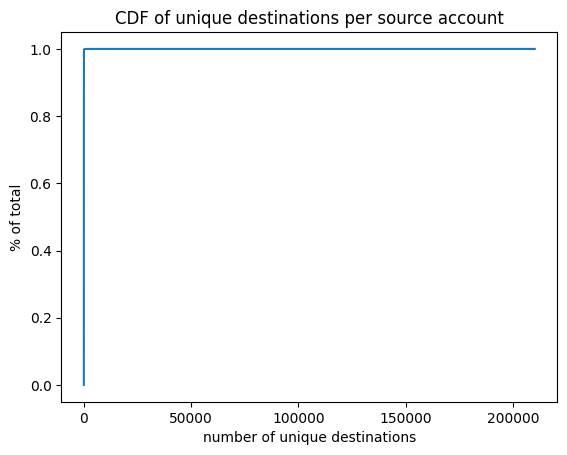

In [21]:
n = len(out_count['count']) # number of unique accounts
counts = out_count['count']
x = np.sort(counts)
y = np.arange(n) / float(n)

plt.xlabel('number of unique destinations')
plt.ylabel('% of total')
plt.title('CDF of unique destinations per source account')
plt.plot(x, y)

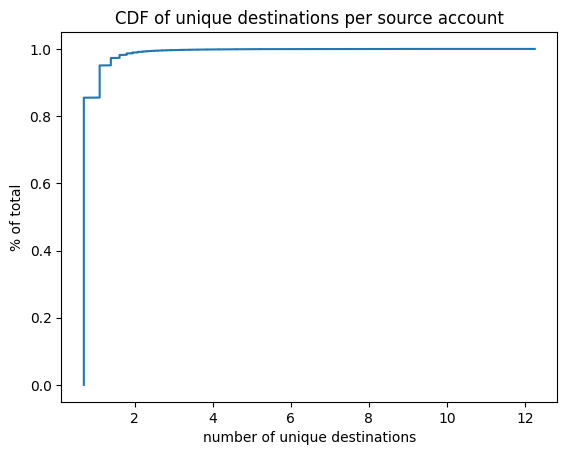

In [22]:
x_log = np.log(x+1)
y = np.arange(n) / float(n)

plt.xlabel('number of unique destinations')
plt.ylabel('% of total')
plt.title('CDF of unique destinations per source account')
plt.plot(x_log, y)

In [48]:
print('mean ', x_log.mean(), 
      '\nstd ', x_log.std(),
      '\nmin ', x_log.min(),
      '\n25% ', np.quantile(x_log, 0.25),
      '\n50% ', np.quantile(x_log, 0.5),
      '\n75% ', np.quantile(x_log, 0.75),
      '\nmax ', x_log.max())

mean  0.7886576413699031 
std  0.32372796424653316 
min  0.6931471805599453 
25%  0.6931471805599453 
50%  0.6931471805599453 
75%  0.6931471805599453 
max  12.255495942562023


In [23]:
data = df[['from_address','to_address','value']].head(10000)
raw_data = data.to_dict('records')

transaction_dict = {}
for row in raw_data:
    id_ = row['from_address']
    if id_ not in transaction_dict:
        transaction_dict[id_] = []
    
    value = row['value']
    transaction_dict[id_].append(value)

In [27]:
#transaction_dict

In [19]:
 {k:v for k, v in transaction_dict.items() if k == '0xd06cd3d829e67ad3455d5035b071813625b0de6b'}

{'0xd06cd3d829e67ad3455d5035b071813625b0de6b': [0.01822458114945,
  0.0579194588188799,
  0.0259433540347499,
  0.01926461185335,
  0.0245689689580199,
  0.01728306256158,
  0.0237755170446299,
  0.0101293320682199,
  0.0186990531319699,
  0.0130647801184299,
  0.0389161713861299,
  0.02325638196848]}

In [ ]:
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

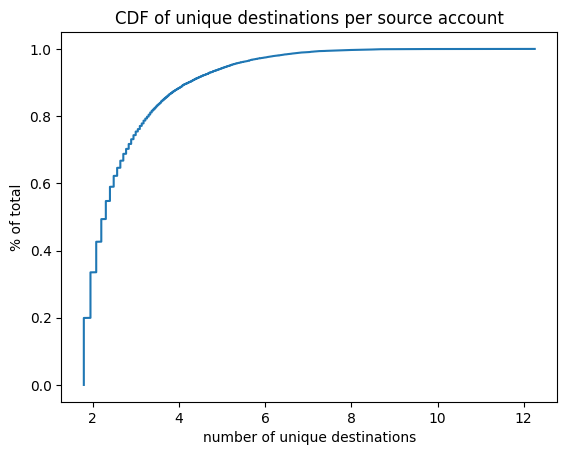

In [62]:
out_count_filtered = out_count.loc[out_count['count'] >= 6]
n = len(out_count_filtered['count']) # number of unique accounts
counts = out_count_filtered['count']
x = np.sort(counts)
x_log = np.log(x)
y = np.arange(n) / float(n)

plt.xlabel('number of unique destinations')
plt.ylabel('% of total')
plt.title('CDF of unique destinations per source account')
plt.plot(x_log, y)

In [63]:
out_count_filtered.describe()

,count
count,12019.000000
mean,93.613113
std,2177.979513
min,6.000000
25%,7.000000
50%,10.000000
75%,20.000000
max,210132.000000
